In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

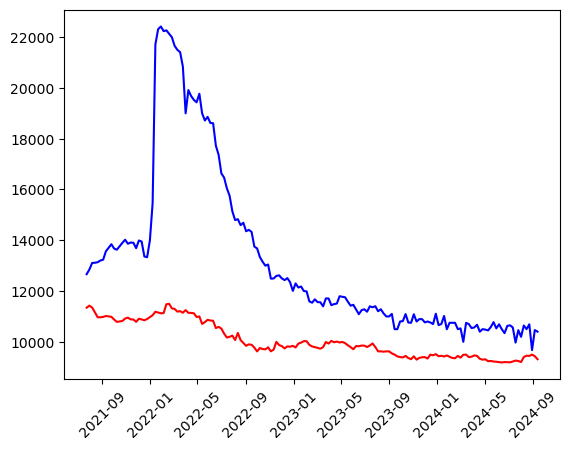

In [50]:
import matplotlib.pyplot as plt

prices = pd.read_csv(r"D:\Pythun projexx\Datasets\RolexPrices.csv")

prices["Date"]=pd.to_datetime(prices["Date"])
prices["124270"]=pd.to_numeric(prices["124270"])
prices["124300"]=pd.to_numeric(prices["124300"])

#prices.shape
#prices.head

#prices.plot(x="Date", y="124270")
#prices.plot(x="Date", y="124300")
plt.xticks(rotation=45)
plt.plot(prices["Date"], prices["124270"], color="red")
plt.plot(prices["Date"], prices["124300"], color="blue")

In [74]:
prices["DateConverted"]=prices["Date"].map(pd.Timestamp.toordinal)
X = prices[["DateConverted"]]
y = prices[["124270","124300"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #randomstate42 to eliminate variance
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

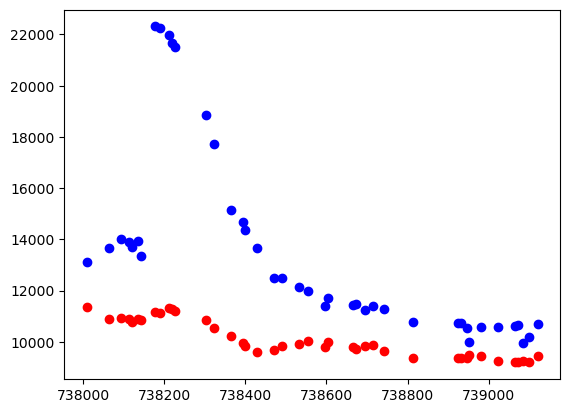

In [96]:
plt.scatter(X_test["DateConverted"], y_test["124270"], color="red")
plt.scatter(X_test["DateConverted"], y_test["124300"], color="blue")

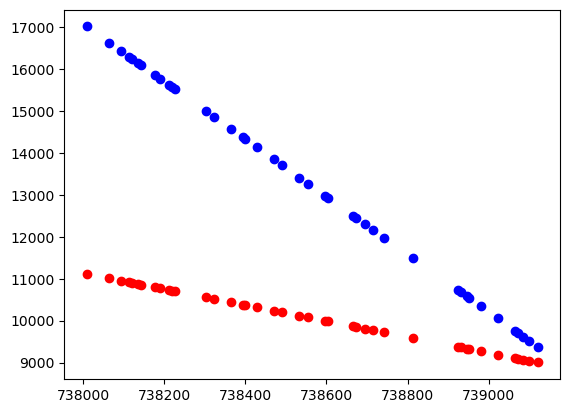

In [128]:
#Convert predictions to dataframe to make it easier to plot
y_pred_df = pd.DataFrame(y_pred, columns=["124270_pred","124300_pred"])

plt.scatter(X_test["DateConverted"], y_pred_df["124270_pred"], color="red")
plt.scatter(X_test["DateConverted"], y_pred_df["124300_pred"], color="blue")

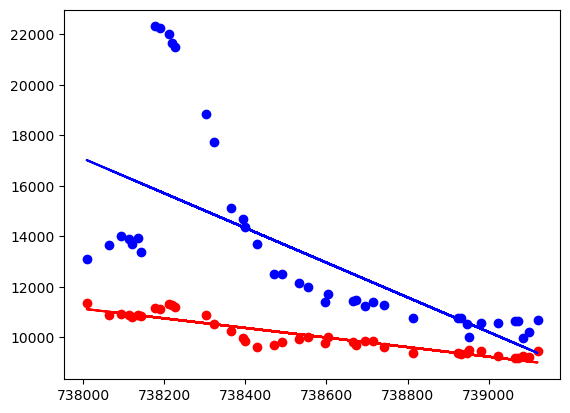

In [132]:
plt.scatter(X_test["DateConverted"], y_test["124270"], color="red")
plt.scatter(X_test["DateConverted"], y_test["124300"], color="blue")
plt.plot(X_test["DateConverted"], y_pred_df["124270_pred"], color="red")
plt.plot(X_test["DateConverted"], y_pred_df["124300_pred"], color="blue")